In [0]:
import tensorflow as tf


# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from io import open

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."


def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    #print("Saving figure", fig_id)
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

A couple utility functions to plot grayscale and RGB images:

In [0]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    #plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [0]:
def plot_conv2d_output(index, images, fmap, output):
  
    fig = plt.figure(1)
    plt.rcParams["figure.figsize"] = (18,18)

    #Define gridspec
    gradint_h = 4
    gradrows = fmap.shape[3] * gradint_h
    gradcols = 13
    gridspec.GridSpec(gradrows, gradcols)

    #Plot original image
    plt.subplot2grid((gradrows, gradcols), (0,0), colspan=6, rowspan=4)
    plt.title('Original')
    plot_image(images[index, :, :, 0])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(images.shape[2])
    plt.ylabel(images.shape[1])

    #Plot feature maps
    for i in range(fmap.shape[3]):
        plt.subplot2grid((gradrows, gradcols), (i*gradint_h , 6))
        if i == 0:
          plt.title('Feature map')
        plt.xlabel(fmap.shape[0])
        plt.ylabel(fmap.shape[1])
        plt.xticks([])
        plt.yticks([])
        plot_image(fmap[:, :, 0, i])

    #Plot Conv2D outputs
    for j in range(fmap.shape[3]):
        plt.subplot2grid((gradrows, gradcols), (j*gradint_h , 7), colspan=6, rowspan=4)
        if j == 0:
          plt.title('Output of Conv2D')
        plt.xlabel(output.shape[2])
        plt.ylabel(output.shape[1])
        plt.xticks([])
        plt.yticks([])
        plot_image(output[index, :, :, j])

    fig.tight_layout()
    plt.show()

And of course we will need TensorFlow:

In [0]:
import tensorflow as tf

# Convolution

### Converlotion is a mathematical operation on two functions (f and g) to produce a third function (f * g) that expresses how the shape of one is modified by the other,

## $ (f * g)(t) =  \intop\nolimits_{-\infty}^{\infty}f( \tau )g(t-\tau)  d\tau  $


### It is illustrated as below diagram,

![alt text](https://github.com/jchen8000/MachineLearning/blob/master/Convolutional%20Neural%20Network/images/convgaus.gif?raw=1)

## Convolution 2D

In [0]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
#image = china[150:220, 130:250]
image = china
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

In [0]:
plt.subplot(2, 2, 1)
plt.title('Flower')
plot_image(flower)

plt.subplot(2, 2, 2)
plt.title('China')
plot_image(china)

plt.subplot(2, 2, 3)
plt.title('image')
plot_image(image)

plt.subplot(2, 2, 4)
plt.title('image_grayscale')
plot_image(image_grayscale)

plt.show()

In [0]:
print( "china image size: ", china.shape )
print( "flower image size: ", flower.shape )
print( "image image size: ", image.shape )
print( "image_grayscale image size: ", image_grayscale.shape )


china image size:  (427, 640, 3)
flower image size:  (427, 640, 3)
image image size:  (427, 640, 3)
image_grayscale image size:  (427, 640)


Create two feature maps, each 7 x 7 pixel, one is horizental, one is vertical.

In [0]:
fmap = np.zeros(shape=(7, 7, 1, 3), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
fmap[3, 3, 0, 2] = 1


Feature maps (7 x 7 matrix) :


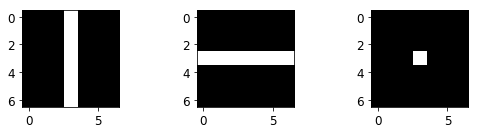

In [0]:
print("Feature maps (7 x 7 matrix) :")

plt.rcParams["figure.figsize"] = (8,3)
for i in range(fmap.shape[3]):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(wspace=0.8)
    plt.imshow(fmap[:, :, 0, i], cmap="gray", interpolation="nearest")
    #plt.axis("off")

In [0]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,3,3,1], padding="SAME")

In [0]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

In [0]:
print( images.shape )
print( feature_maps.shape )
print( output.shape )

(1, 427, 640, 1)
(7, 7, 1, 3)
(1, 143, 214, 3)


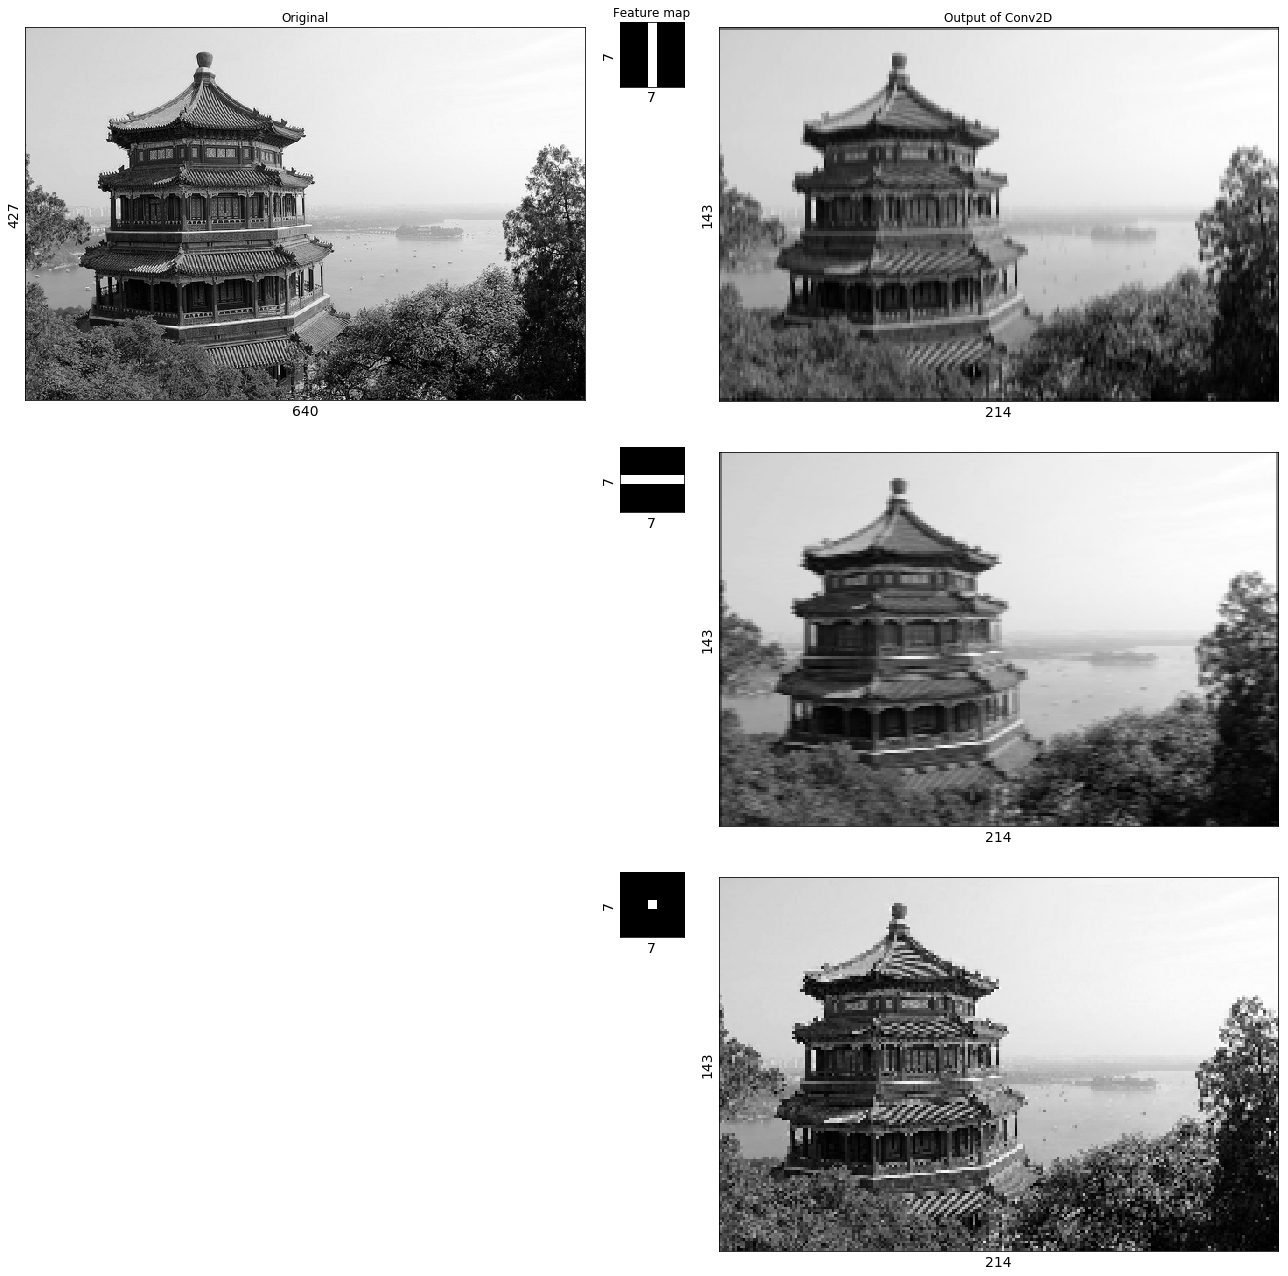

In [0]:
plot_conv2d_output(0, images, fmap, output)

# Visualize Keras Conv2D Layer

[link text](https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59)

In [3]:
import numpy as np
from sklearn.datasets import load_sample_image
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [4]:
# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
dataset /= 255
batch_size, height, width, channels = dataset.shape
input_shape = dataset.shape[1:]
print(input_shape)

(427, 640, 3)


In [0]:
fig = plt.figure(1, figsize=(16,6))
  
plt.subplot(1, 2, 1)
plt.title('Flower')
plot_image(flower)

plt.subplot(1, 2, 2)
plt.title('China')
plot_image(china)

plt.show()

In [5]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape = input_shape, padding='same', strides = (2, 2), activation = 'relu'))
output = model.predict(dataset)
output.shape

Instructions for updating:
Colocations handled automatically by placer.


(2, 214, 320, 64)

In [0]:
def plot_KerasConv2d_output(conv_output):

    features = conv_output.shape[3]
    if features > 4:
      features = 4

    fig = plt.figure(1, figsize=(18,conv_output.shape[0]*4))  

    i = 1
    for image_index in range(conv_output.shape[0]):
      for feature in range(features):
        plt.subplot(conv_output.shape[0], features, i)
        channel_index = np.random.randint(conv_output.shape[3])
        plot_image(conv_output[image_index,:,:,channel_index])
        plt.title("image = " + str(image_index) + ", channel = " + str(channel_index) )
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(conv_output.shape[2])
        plt.ylabel(conv_output.shape[1])
        i = i + 1
    plt.show()

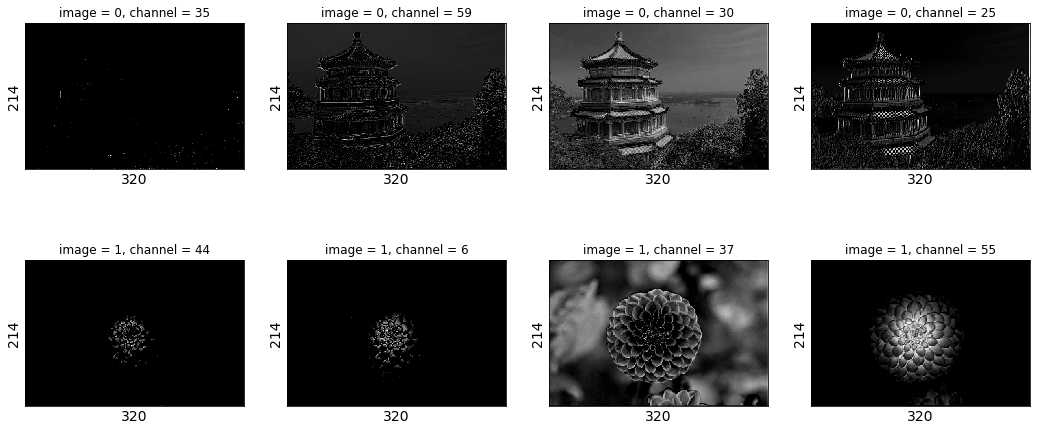

In [8]:
plot_KerasConv2d_output(output)

Plot a specific output

In [0]:
plot_image(output[1,:,:,42])

# Visualize Keras MaxPooling Layer

In [16]:
model2= Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3), input_shape = input_shape, padding='same', strides = (2, 2), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
output2 = model2.predict(dataset)
output2.shape

(2, 107, 160, 64)

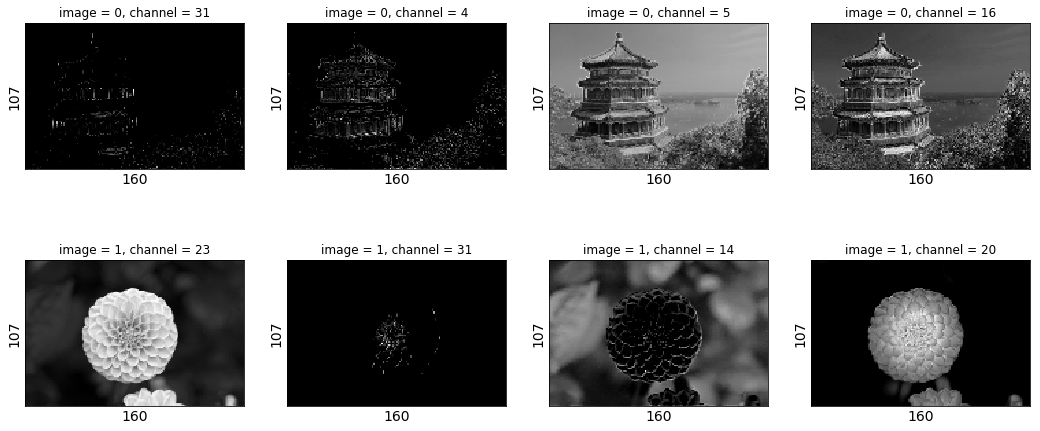

In [17]:
plot_KerasConv2d_output(output2)

In [0]:
plot_image(output2[1,:,:,14])

# Pooling layer

In [0]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

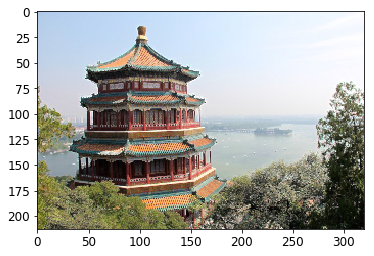

In [0]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.show()

Saving figure china_original


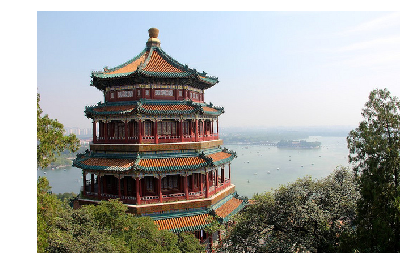

Saving figure china_max_pool


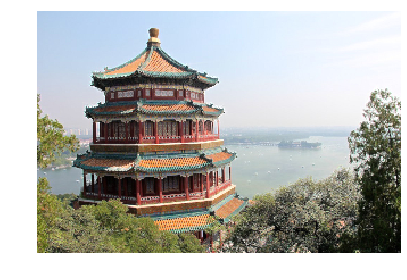

In [0]:
plot_color_image(dataset[0])
save_fig("china_original")
plt.show()
    
plot_color_image(output[0])
save_fig("china_max_pool")
plt.show()